In [27]:
import os
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as implt
from PIL import Image 
import keras, cv2, shutil, keras_preprocessing, requests, math, glob, datetime
import tensorflow as tf
from keras import layers
from keras.models import Sequential, Model 
from keras.layers import Lambda, Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation, SpatialDropout2D, GlobalAveragePooling2D 
from keras.callbacks import EarlyStopping
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3, preprocess_input as inception_preprocessor
from keras.applications.xception import Xception, preprocess_input as xception_preprocessor
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input as inc_resnet_preprocessor
from keras.applications.nasnet import NASNetLarge, preprocess_input as nasnet_preprocessor
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import load_files
from io import BytesIO
import seaborn as sns
import xml.etree.ElementTree as ET
from tensorflow.keras.utils import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input
from pathlib import Path
%load_ext tensorboard
shutil.rmtree('./logs', ignore_errors=True)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [2]:
train_dir = "C:/Users/kjosh/OneDrive/Documents/UChicago/ADSP 31009 - Machine Learning & Predictive Analytics/Final Project/Train_Test_Split/train/" 

In [3]:
test_dir = "C:/Users/kjosh/OneDrive/Documents/UChicago/ADSP 31009 - Machine Learning & Predictive Analytics/Final Project/Train_Test_Split/test/" 

In [4]:
target_size = (128, 128)
input_shape = (128, 128, 3)

In [5]:
batch_size = 256

In [6]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range = 0.3,
    zoom_range = 0.3,
    horizontal_flip=True,
    rotation_range = 30
)

In [7]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical')

Found 17651 images belonging to 120 classes.


In [8]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255)

In [9]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 4475 images belonging to 120 classes.


In [10]:
inputs = keras.Input(shape=input_shape)

base_xcept_model = keras.applications.Xception(
    weights = 'imagenet',
    input_shape=input_shape,
    include_top=False)
base_xcept_model.trainable = False

In [43]:
x = base_xcept_model.output
x = GlobalAveragePooling2D()(x)
outputs = Dense(120, activation='softmax')(x)
model = keras.Model(base_xcept_model.input, outputs)
for layer in base_xcept_model.layers: layer.trainable = False

In [12]:
optimizer = keras.optimizers.Adam(learning_rate=0.01, epsilon=0.1)

In [13]:
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
log_dir = "./logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

In [14]:
checkpoint_callback = keras.callbacks.ModelCheckpoint(filepath='convnet_from_scratch.tf', save_best_only=True, monitor='val_accuracy', mode='max')
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
early_stoppage_callback = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=0.001, patience=7, restore_best_weights = True)

In [15]:
history = model.fit(train_generator, 
            steps_per_epoch = 20,
            epochs=50,
            verbose=1,
            validation_data=test_generator, 
            callbacks=[tensorboard_callback, early_stoppage_callback, checkpoint_callback]
            )

Epoch 1/50
20/20 [==============================] - ETA: 0s - loss: 5.1575 - accuracy: 0.0082 INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


20/20 [==============================] - 410s 21s/step - loss: 5.1575 - accuracy: 0.0082 - val_loss: 4.8255 - val_accuracy: 0.0250
Epoch 2/50
20/20 [==============================] - ETA: 0s - loss: 4.5828 - accuracy: 0.0484 INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


20/20 [==============================] - 412s 21s/step - loss: 4.5828 - accuracy: 0.0484 - val_loss: 4.1062 - val_accuracy: 0.1225
Epoch 3/50
20/20 [==============================] - ETA: 0s - loss: 3.9256 - accuracy: 0.1629 INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


20/20 [==============================] - 405s 21s/step - loss: 3.9256 - accuracy: 0.1629 - val_loss: 3.3512 - val_accuracy: 0.2869
Epoch 4/50
20/20 [==============================] - ETA: 0s - loss: 3.2862 - accuracy: 0.3057 INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


20/20 [==============================] - 398s 20s/step - loss: 3.2862 - accuracy: 0.3057 - val_loss: 2.6747 - val_accuracy: 0.4331
Epoch 5/50
20/20 [==============================] - ETA: 0s - loss: 2.7941 - accuracy: 0.3951INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


20/20 [==============================] - 262s 13s/step - loss: 2.7941 - accuracy: 0.3951 - val_loss: 2.1599 - val_accuracy: 0.5289
Epoch 6/50
20/20 [==============================] - ETA: 0s - loss: 2.4285 - accuracy: 0.4621INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


20/20 [==============================] - 256s 13s/step - loss: 2.4285 - accuracy: 0.4621 - val_loss: 1.8157 - val_accuracy: 0.5841
Epoch 7/50
20/20 [==============================] - ETA: 0s - loss: 2.1465 - accuracy: 0.4965INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


20/20 [==============================] - 242s 12s/step - loss: 2.1465 - accuracy: 0.4965 - val_loss: 1.5905 - val_accuracy: 0.6185
Epoch 8/50
20/20 [==============================] - ETA: 0s - loss: 1.9662 - accuracy: 0.5218INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


20/20 [==============================] - 236s 12s/step - loss: 1.9662 - accuracy: 0.5218 - val_loss: 1.4451 - val_accuracy: 0.6340
Epoch 9/50
20/20 [==============================] - ETA: 0s - loss: 1.8391 - accuracy: 0.5434INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


20/20 [==============================] - 245s 13s/step - loss: 1.8391 - accuracy: 0.5434 - val_loss: 1.3463 - val_accuracy: 0.6496
Epoch 10/50
20/20 [==============================] - ETA: 0s - loss: 1.7589 - accuracy: 0.5568INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


20/20 [==============================] - 337s 17s/step - loss: 1.7589 - accuracy: 0.5568 - val_loss: 1.2772 - val_accuracy: 0.6603
Epoch 11/50
20/20 [==============================] - ETA: 0s - loss: 1.7164 - accuracy: 0.5535INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


20/20 [==============================] - 234s 12s/step - loss: 1.7164 - accuracy: 0.5535 - val_loss: 1.2284 - val_accuracy: 0.6684
Epoch 12/50
20/20 [==============================] - ETA: 0s - loss: 1.6924 - accuracy: 0.5610INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


20/20 [==============================] - 232s 12s/step - loss: 1.6924 - accuracy: 0.5610 - val_loss: 1.1839 - val_accuracy: 0.6711
Epoch 13/50
20/20 [==============================] - ETA: 0s - loss: 1.5931 - accuracy: 0.5846INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


20/20 [==============================] - 236s 12s/step - loss: 1.5931 - accuracy: 0.5846 - val_loss: 1.1536 - val_accuracy: 0.6764
Epoch 14/50
20/20 [==============================] - ETA: 0s - loss: 1.5579 - accuracy: 0.5902INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


20/20 [==============================] - 233s 12s/step - loss: 1.5579 - accuracy: 0.5902 - val_loss: 1.1345 - val_accuracy: 0.6845
Epoch 15/50
20/20 [==============================] - 225s 11s/step - loss: 1.5664 - accuracy: 0.5857 - val_loss: 1.1138 - val_accuracy: 0.6807
Epoch 16/50
20/20 [==============================] - ETA: 0s - loss: 1.5274 - accuracy: 0.5988INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


20/20 [==============================] - 235s 12s/step - loss: 1.5274 - accuracy: 0.5988 - val_loss: 1.0930 - val_accuracy: 0.6865
Epoch 17/50
20/20 [==============================] - 227s 12s/step - loss: 1.4782 - accuracy: 0.5984 - val_loss: 1.0867 - val_accuracy: 0.6851
Epoch 18/50
20/20 [==============================] - ETA: 0s - loss: 1.5007 - accuracy: 0.5975INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


20/20 [==============================] - 234s 12s/step - loss: 1.5007 - accuracy: 0.5975 - val_loss: 1.0752 - val_accuracy: 0.6914
Epoch 19/50
20/20 [==============================] - ETA: 0s - loss: 1.4598 - accuracy: 0.6068INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


20/20 [==============================] - 232s 12s/step - loss: 1.4598 - accuracy: 0.6068 - val_loss: 1.0610 - val_accuracy: 0.6918
Epoch 20/50
20/20 [==============================] - ETA: 0s - loss: 1.4654 - accuracy: 0.6031INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


20/20 [==============================] - 234s 12s/step - loss: 1.4654 - accuracy: 0.6031 - val_loss: 1.0484 - val_accuracy: 0.6934
Epoch 21/50
20/20 [==============================] - 225s 11s/step - loss: 1.4310 - accuracy: 0.6094 - val_loss: 1.0468 - val_accuracy: 0.6909
Epoch 22/50
20/20 [==============================] - ETA: 0s - loss: 1.4496 - accuracy: 0.6105INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


20/20 [==============================] - 232s 12s/step - loss: 1.4496 - accuracy: 0.6105 - val_loss: 1.0374 - val_accuracy: 0.6943
Epoch 23/50
20/20 [==============================] - ETA: 0s - loss: 1.4702 - accuracy: 0.6025INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


20/20 [==============================] - 236s 12s/step - loss: 1.4702 - accuracy: 0.6025 - val_loss: 1.0309 - val_accuracy: 0.7015
Epoch 24/50
20/20 [==============================] - 228s 12s/step - loss: 1.4272 - accuracy: 0.6131 - val_loss: 1.0248 - val_accuracy: 0.6990
Epoch 25/50
20/20 [==============================] - 224s 11s/step - loss: 1.4033 - accuracy: 0.6137 - val_loss: 1.0200 - val_accuracy: 0.6988
Epoch 26/50
20/20 [==============================] - 319s 16s/step - loss: 1.3731 - accuracy: 0.6172 - val_loss: 1.0150 - val_accuracy: 0.7015
Epoch 27/50
20/20 [==============================] - 386s 20s/step - loss: 1.4014 - accuracy: 0.6170 - val_loss: 1.0118 - val_accuracy: 0.7008
Epoch 28/50
20/20 [==============================] - ETA: 0s - loss: 1.3723 - accuracy: 0.6141 INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


20/20 [==============================] - 399s 20s/step - loss: 1.3723 - accuracy: 0.6141 - val_loss: 1.0079 - val_accuracy: 0.7021
Epoch 29/50
20/20 [==============================] - 394s 20s/step - loss: 1.3559 - accuracy: 0.6221 - val_loss: 1.0113 - val_accuracy: 0.7019
Epoch 30/50
20/20 [==============================] - 387s 20s/step - loss: 1.3529 - accuracy: 0.6188 - val_loss: 1.0054 - val_accuracy: 0.6994


In [16]:
history_df = pd.DataFrame(history.history)

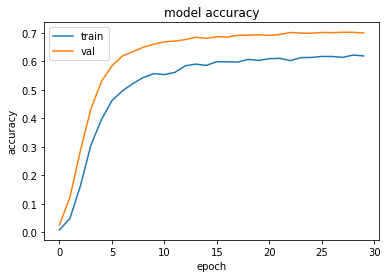

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

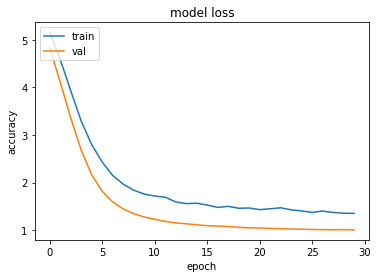

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [19]:
class_labels = []
for i in os.listdir('C:/Users/kjosh/OneDrive/Documents/UChicago/ADSP 31009 - Machine Learning & Predictive Analytics/Final Project/Train_Test_Split/train/'):
    class_labels.append(i)

In [40]:
predictions = []
confidence = []

In [39]:
example_images = "C:/Users/kjosh/OneDrive/Documents/UChicago/ADSP 31009 - Machine Learning & Predictive Analytics/Final Project/Test_Images/"

In [41]:
for image in os.listdir(example_images): 
    my_image = load_img(os.path.join(example_images,image), target_size=target_size)
    my_image = img_to_array(my_image)
    my_image = my_image/255
    my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
    prediction = model.predict(my_image)
    predicted_class_index = np.argmax(prediction)
    predictions.append(class_labels[predicted_class_index])
    confidence.append(round(prediction[0][predicted_class_index] * 100, 2))

1/1 [==============================] - 0s 68ms/step


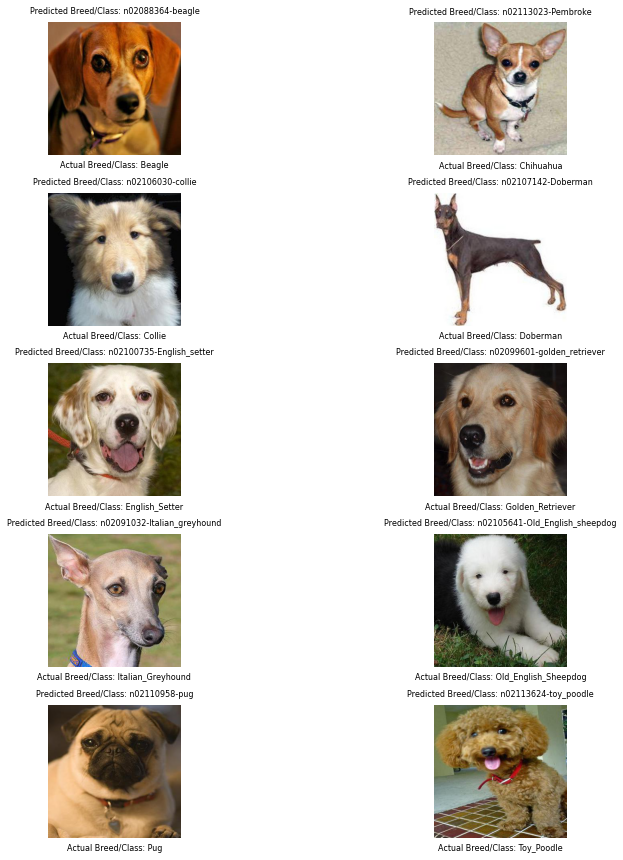

In [42]:
# Get a list of all image files in the directory
image_files = [file for file in os.listdir(example_images)]

# Set up the plot with multiple subplots
num_images = len(image_files)
num_cols = 2  # Number of columns in the plot
num_rows = (num_images - 1) // num_cols + 1  # Number of rows in the plot

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

# Loop through the image files and plot them
for i, file in enumerate(image_files):
    row = i // num_cols
    col = i % num_cols

    # Load the image using matplotlib's imread function
    image_path = os.path.join(example_images, file)
    image = plt.imread(image_path)

    # Plot the image on the corresponding subplot
    axes[row, col].imshow(image)
    axes[row, col].axis('off')
    axes[row, col].text(0.5, -0.1, f'Actual Breed/Class: {os.path.splitext(file)[0]}', fontsize=8, ha='center', transform=axes[row, col].transAxes)
    axes[row, col].text(0.5, 1.06, f'Predicted Breed/Class: {predictions[i]}', fontsize=8, ha='center', transform=axes[row, col].transAxes)
# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()